In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 이미지 크기 조절
**보간법(Interpolation)**
~~~
1D nearest-neighbor, Linear, Cubic, 2D nearest neighbor, Bilinear, Bicubic
~~~
**cv2.resize(image, dsize, fx, fy, interpolation): 이미지의 크기를 조절한다**
~~~
dsize: Manual Size
fx: 가로 비율
fy: 세로 비율
interpolation: 보간법
INTER_CUBIC: 사이즈를 크게 할 때 주로 사용한다
INTER_AREA: 사이즈를 작게 할 때 주로 사용한다

보간법을 사이즈가 병할 때 픽셀 사이의 값을 조절하는 방법을 의미한다
~~~

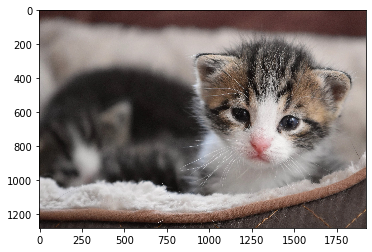

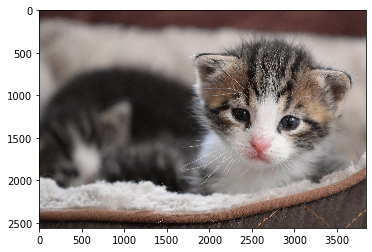

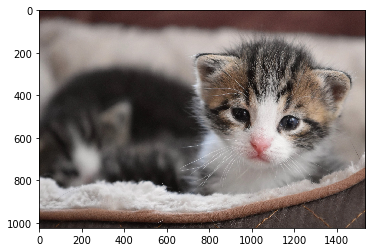

In [2]:
cat_img=cv2.imread('cat.jpg')
plt.imshow(cv2.cvtColor(cat_img, cv2.COLOR_BGR2RGB))
plt.show()

#이미지 키우기
expand=cv2.resize(cat_img, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(expand, cv2.COLOR_BGR2RGB))
plt.show()

#이미지 줄이기
shrink=cv2.resize(cat_img, None, fx=0.8, fy=0.8, interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(shrink, cv2.COLOR_BGR2RGB))
plt.show()

# 이미지의 위치 변경
**cv2.warpAffine(image, M, dsize): 이미지의 위치를 변경한다**
~~~
M: 변환 행렬
dsize: Manual Size
~~~
~~~
M11  M12  M13        a
M21  M22  M23   을   b   의 결과는 (M11*a+M12*b+M13, M21*a+M22*b+M23)
~~~

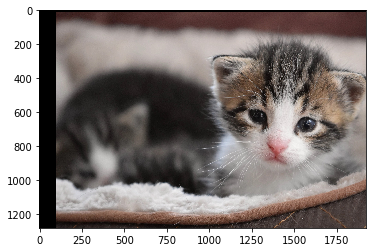

In [3]:
image=cv2.imread('cat.jpg')

#행과 열 정보만 저장
height, width =image.shape[:2]

M=np.float32([[1,0,100], [0,1,10]])   #오른쪽으로 100 아래로 10 이동
dst=cv2.warpAffine(image, M, (width, height))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

# 이미지 회전
**cv2.getRotationMatrix2D(center, angle, scale): 이미지 회전을 위한 변환 행렬 생성**
~~~
center: 회전 중심
angle: 회전 각도
scale: Scale Factor
~~~

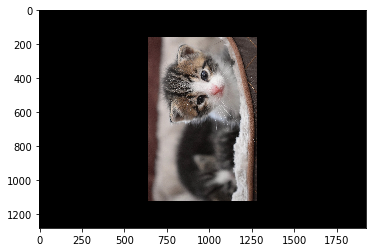

In [4]:
#변황 행렬(이미지 변형 캡쳐 참조!!)
M=cv2.getRotationMatrix2D((width/2, height/2), 90, 0.5)   #scale=0.5, sin=90
dst=cv2.warpAffine(image, M, (width, height))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

# OpenCV 이미지 합치기
~~~
이미지를 합치는 두 가지 방법

1. cv2.add(): Saturation 연산을 수행
    0보다 작으면 0, 255보다 크면 255로 표현
2. np.add(): Modulo 연산을 수행합니다.
    256은 0, 257은 1로 표현 
~~~    
**257은 1로 표현하는 문제 때문에 numpy의 add는 잘 사용하지 않고 Modulo 연산으로 이미지를 주로 합침**

In [ ]:
moon_img=cv2.imread("moon.jpg", cv2.IMREAD_COLOR)
moonCopy=moon_img.copy()
moonCopy=moon_img[]